### Imports

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
data_path = '../Data/'

### train/Test Files

In [4]:
application_train = pd.read_csv(data_path + 'Raw/application_train.csv')
application_test = pd.read_csv(data_path + 'Raw/application_test.csv')

In [5]:
application_train.info(max_cols = 123)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [6]:
binary_categorical_columns = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',\
                             'FLAG_EMAIL', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',\
                             'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',\
                             'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',\
                             'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',\
                             'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

categorical_columns = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',\
                      'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT']

continuos_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',\
                    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',\
                    'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',\
                    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', \
                     'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON']

#### binary_categorical_columns

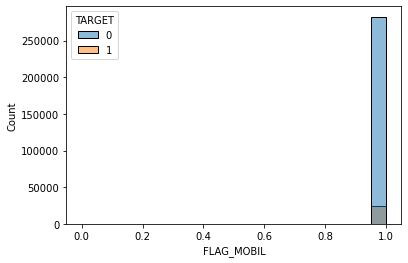

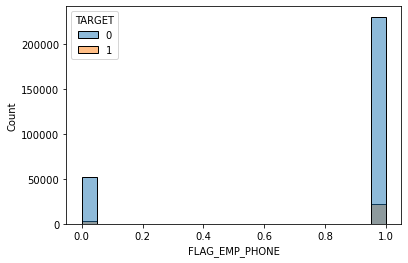

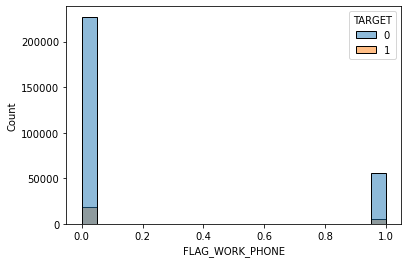

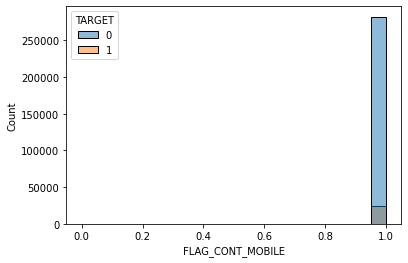

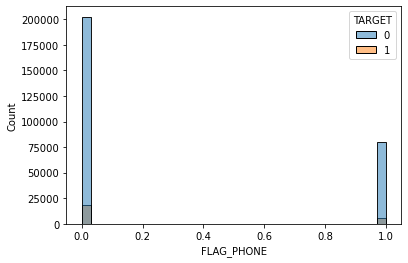

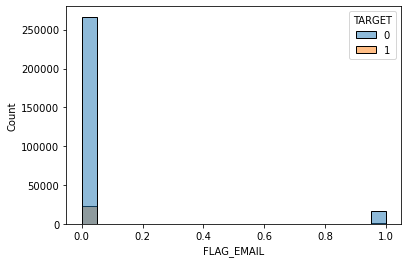

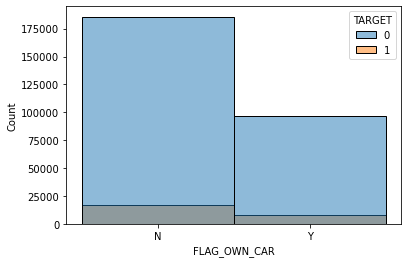

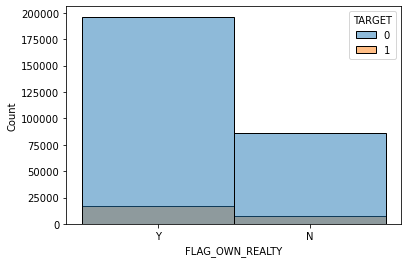

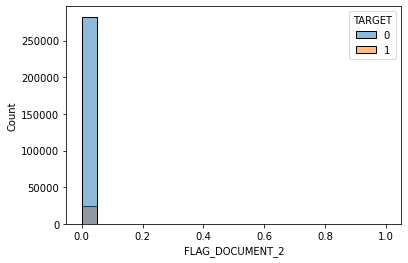

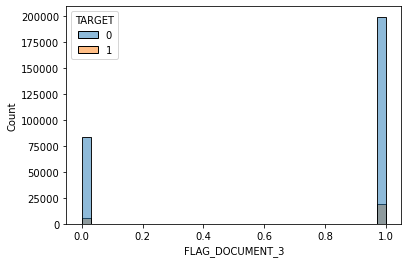

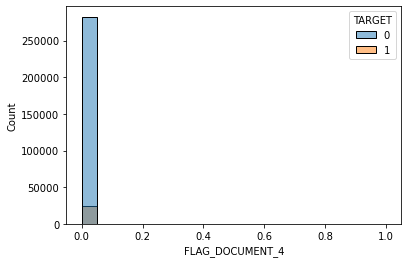

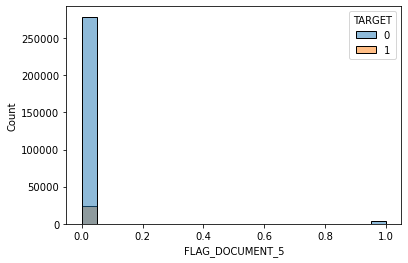

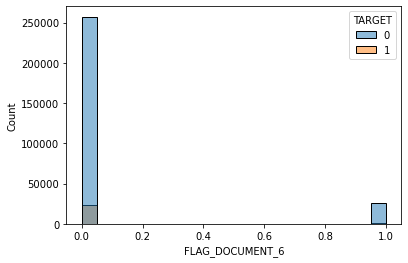

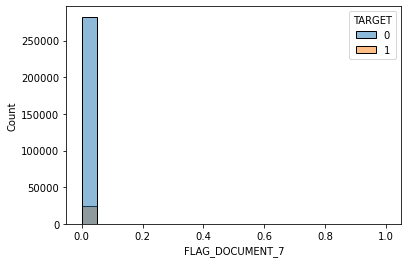

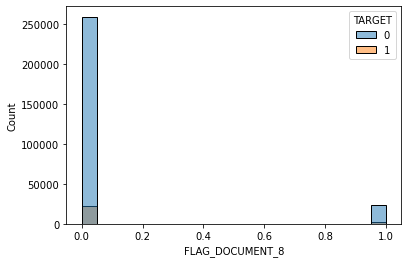

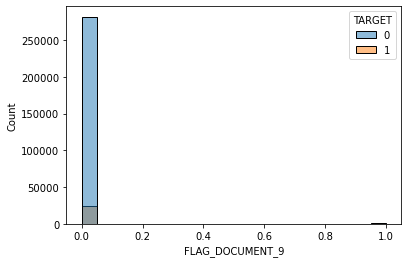

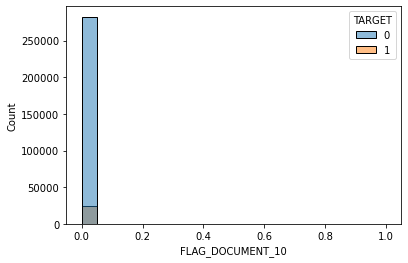

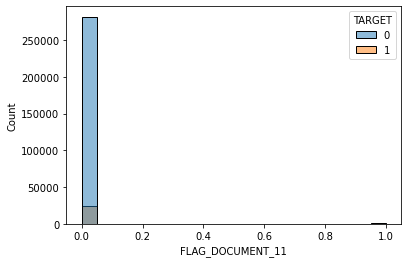

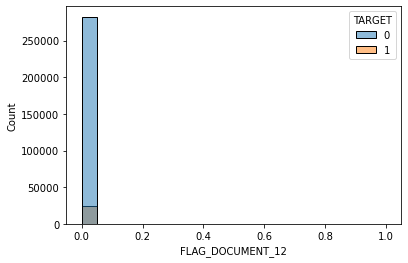

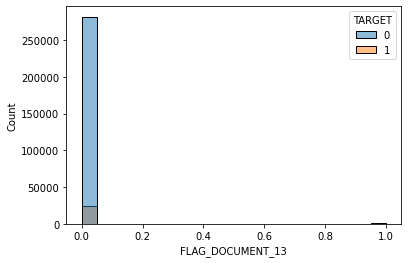

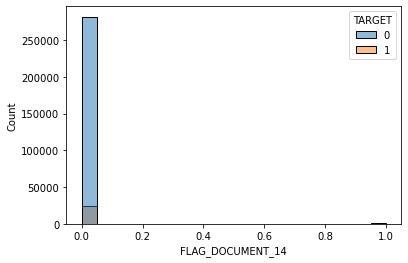

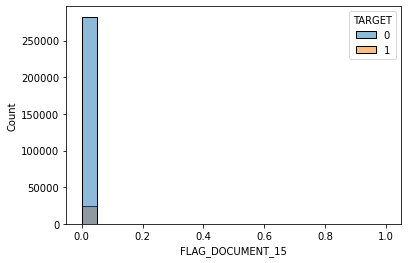

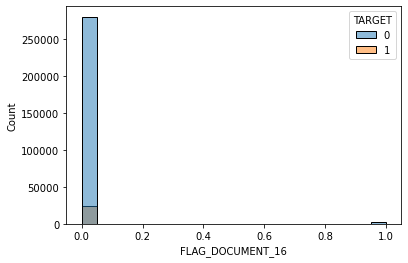

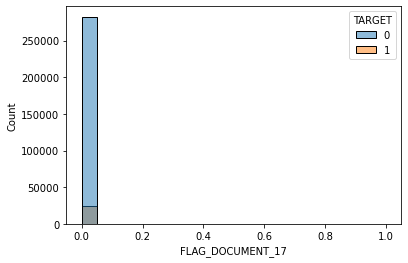

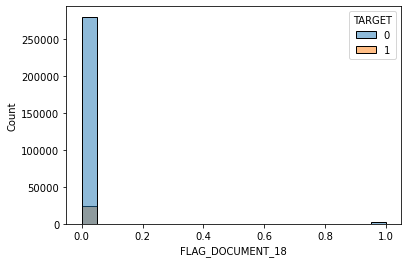

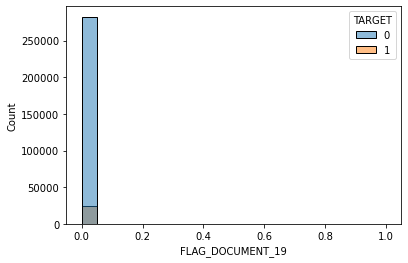

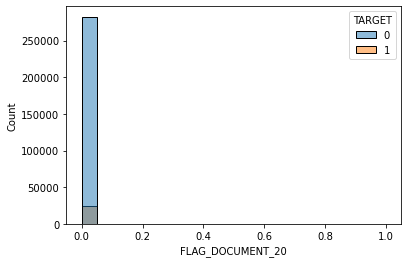

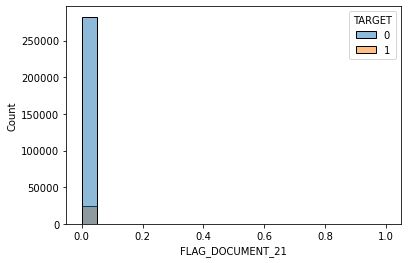

In [7]:
for col in binary_categorical_columns:
    sns.histplot(x = col, data = application_train, hue = 'TARGET')
    plt.show()

#### Removing Columns with no Variations

In [8]:
drop_cols = ['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7',\
            'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',\
            'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',\
            'FLAG_DOCUMENT_21']

for d in drop_cols:
    binary_categorical_columns.remove(d)

### categorical_columns

In [9]:
for cat in categorical_columns:
    print(application_train[cat].value_counts())

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10

In [10]:
application_train.loc[application_train.NAME_TYPE_SUITE == 'Spouse, partner', 'NAME_TYPE_SUITE'] = 'Partner'
application_train.loc[application_train.NAME_TYPE_SUITE.isin(['Other_B', 'Other_A', 'Group of people']), \
                      'NAME_TYPE_SUITE'] = 'Others'
application_train.NAME_TYPE_SUITE.value_counts()

Unaccompanied    248526
Family            40149
Partner           11370
Children           3267
Others             2907
Name: NAME_TYPE_SUITE, dtype: int64

In [11]:
application_test.loc[application_test.NAME_TYPE_SUITE == 'Spouse, partner', 'NAME_TYPE_SUITE'] = 'Partner'
application_test.loc[application_test.NAME_TYPE_SUITE.isin(['Other_B', 'Other_A', 'Group of people']), \
                      'NAME_TYPE_SUITE'] = 'Others'
application_test.NAME_TYPE_SUITE.value_counts()

Unaccompanied    39727
Family            5881
Partner           1448
Children           408
Others             369
Name: NAME_TYPE_SUITE, dtype: int64

In [12]:
application_train.loc[application_train.OCCUPATION_TYPE.isin(['Low-skill Laborers', 'Cooking staff', 'Cleaning staff', 'Security staff', \
                                                              'Waiters/barmen staff']), 'OCCUPATION_TYPE']  = 'Staff'
application_train.loc[application_train.OCCUPATION_TYPE.isin(['IT staff', 'HR staff', 'Security staff', 'Realty agents',\
                                                             'Private service staff', 'Secretaries']), 'OCCUPATION_TYPE'] \
                                                                                            = 'mid Staff'

application_train.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Staff                    20761
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
mid Staff                 5797
Name: OCCUPATION_TYPE, dtype: int64

In [13]:
application_test.loc[application_test.OCCUPATION_TYPE.isin(['Low-skill Laborers', 'Cooking staff', 'Cleaning staff', 'Security staff', \
                                                              'Waiters/barmen staff']), 'OCCUPATION_TYPE']  = 'Staff'
application_test.loc[application_test.OCCUPATION_TYPE.isin(['IT staff', 'HR staff', 'Security staff', 'Realty agents',\
                                                             'Private service staff', 'Secretaries']), 'OCCUPATION_TYPE'] \
                                                                                            = 'mid Staff'

application_test.OCCUPATION_TYPE.value_counts()

Laborers                 8655
Sales staff              5072
Core staff               4361
Managers                 3574
Staff                    2915
Drivers                  2773
High skill tech staff    1854
Accountants              1628
Medicine staff           1316
mid Staff                 991
Name: OCCUPATION_TYPE, dtype: int64

In [14]:
application_train.OCCUPATION_TYPE.fillna('Missing', inplace = True)
application_test.OCCUPATION_TYPE.fillna('Missing', inplace = True)

In [15]:
industry_type = ['Transport:', 'Trade:', 'Business', 'Industry:']
for i in industry_type:
    application_train.loc[application_train.ORGANIZATION_TYPE.str.contains(i), 'ORGANIZATION_TYPE'] = i
    application_test.loc[application_test.ORGANIZATION_TYPE.str.contains(i), 'ORGANIZATION_TYPE'] = i

In [16]:
application_train.ORGANIZATION_TYPE.value_counts()

Business               84529
XNA                    55374
Self-employed          38412
Other                  16683
Trade:                 14315
Industry:              14311
Medicine               11193
Government             10404
Transport:              8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion      

In [17]:
school = ['School', 'Kindergarten', 'University']
Government = ['Security', 'Police', 'Military', 'Bank', 'Security Ministries', 'Postal']
Other = ['Construction', 'Housing', 'Agriculture', 'Restaurant', 'Services', 'Hotel', 'Electricity', 'Insurance', 'Telecom',\
         'Emergency', 'Advertising', 'Realtor', 'Culture', 'Mobile', 'Legal Services', 'Cleaning', 'Religion']

In [18]:
application_train.loc[application_train.ORGANIZATION_TYPE.isin(school), 'ORGANIZATION_TYPE']  = 'School'
application_test.loc[application_test.ORGANIZATION_TYPE.isin(school), 'ORGANIZATION_TYPE']  = 'School'

application_train.loc[application_train.ORGANIZATION_TYPE.isin(Government), 'ORGANIZATION_TYPE'] = 'Government'
application_test.loc[application_test.ORGANIZATION_TYPE.isin(Government), 'ORGANIZATION_TYPE'] = 'Government'


application_train.loc[application_train.ORGANIZATION_TYPE.isin(Other), 'ORGANIZATION_TYPE'] = 'Other_b'
application_test.loc[application_test.ORGANIZATION_TYPE.isin(Other), 'ORGANIZATION_TYPE'] = 'Other_b'



In [19]:
application_train.ORGANIZATION_TYPE.value_counts()

Business         84529
XNA              55374
Self-employed    38412
Government       25264
Other_b          21340
School           17100
Other            16683
Trade:           14315
Industry:        14311
Medicine         11193
Transport:        8990
Name: ORGANIZATION_TYPE, dtype: int64

In [20]:
application_train.loc[application_train.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'
application_test.loc[application_test.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'


In [21]:
Other = ['Unemployed', 'Student', 'Businessman', 'Maternity leave']
application_train.loc[application_train.NAME_INCOME_TYPE.isin(Other), 'NAME_INCOME_TYPE'] = 'Other'
application_test.loc[application_test.NAME_INCOME_TYPE.isin(Other), 'NAME_INCOME_TYPE'] = 'Other'


In [22]:
for cat in categorical_columns:
    print(application_train[cat].value_counts())

Unaccompanied    248526
Family            40149
Partner           11370
Children           3267
Others             2907
Name: NAME_TYPE_SUITE, dtype: int64
Missing                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Staff                    20761
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
mid Staff                 5797
Name: OCCUPATION_TYPE, dtype: int64
Business         84529
XNA              55374
Self-employed    38412
Government       25264
Other_b          21340
School           17100
Other            16683
Trade:           14315
Industry:        14311
Medicine         11193
Transport:        8990
Name: ORGANIZATION_TYPE, dtype: int64
F    202452
M    105059
Name: CODE_GENDER, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21

In [23]:
Low = ['Incomplete higher', 'Lower secondary', 'Secondary / secondary special']
high = ['Higher education', 'Academic degree']
application_train.loc[application_train.NAME_EDUCATION_TYPE.isin(Low), 'NAME_EDUCATION_TYPE'] = 'Low'
application_test.loc[application_test.NAME_EDUCATION_TYPE.isin(Low), 'NAME_EDUCATION_TYPE'] = 'Low'
application_train.loc[application_train.NAME_EDUCATION_TYPE.isin(high), 'NAME_EDUCATION_TYPE'] = 'high'
application_test.loc[application_test.NAME_EDUCATION_TYPE.isin(high), 'NAME_EDUCATION_TYPE'] = 'high'


In [24]:
Single = ['Single / not married', 'Separated', 'Widow', 'Unkown']
application_train.loc[~application_train.NAME_FAMILY_STATUS.isin(Single), 'NAME_FAMILY_STATUS'] = 'Married'
application_test.loc[~application_test.NAME_FAMILY_STATUS.isin(Single), 'NAME_FAMILY_STATUS'] = 'Married'
application_train.loc[application_train.NAME_FAMILY_STATUS.isin(Single), 'NAME_FAMILY_STATUS'] = 'Single'
application_test.loc[application_test.NAME_FAMILY_STATUS.isin(Single), 'NAME_FAMILY_STATUS'] = 'Single'



In [25]:
apt = ['Co-op apartment', 'Office apartment', 'Rented apartment']
application_train.loc[application_train.NAME_HOUSING_TYPE.isin(apt), 'NAME_HOUSING_TYPE'] = 'Other'
application_test.loc[application_test.NAME_HOUSING_TYPE.isin(apt), 'NAME_HOUSING_TYPE'] = 'Other'

In [28]:
application_train.NAME_TYPE_SUITE.fillna('Missing', inplace = True)
application_test.NAME_TYPE_SUITE.fillna('Missing', inplace = True)
application_test[categorical_columns].isnull().sum()

NAME_TYPE_SUITE         0
OCCUPATION_TYPE         0
ORGANIZATION_TYPE       0
CODE_GENDER             0
NAME_INCOME_TYPE        0
NAME_EDUCATION_TYPE     0
NAME_FAMILY_STATUS      0
NAME_HOUSING_TYPE       0
REGION_RATING_CLIENT    0
dtype: int64

### Continuous Variables

In [29]:
def remove_outliers(data, column):
    
    
    mean = data[column].mean()
    std = data[column].std()
    lower, upper = mean - 3*std, mean + 3*std
    
    mask = (data[column] < upper) &   (data[column] > lower)
    
    data.loc[~mask, column] = np.nan
    return data

In [30]:
days = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for d in days:
    application_train[d] = application_train[d]/365
    application_test[d] = application_test[d]/365
    
days = ['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
for d in days:
    application_train[d] = application_train[d]*-1
    application_test[d] = application_test[d]*-1    

In [32]:
app_train = application_train.copy()
for col in continuos_columns:
    app_train = remove_outliers(app_train, col)

In [33]:
app_test = application_test.copy()
for col in continuos_columns:
    app_test = remove_outliers(app_test, col)

In [34]:
missing = {'AMT_INCOME_TOTAL' : app_train.AMT_INCOME_TOTAL.median(),\
 'AMT_CREDIT' : app_train.AMT_CREDIT.median(),\
 'AMT_ANNUITY' : app_train.AMT_ANNUITY.mean(),\
 'AMT_GOODS_PRICE' : app_train.AMT_GOODS_PRICE.median(),\
 'REGION_POPULATION_RELATIVE' : app_train.REGION_POPULATION_RELATIVE.mean(),\
 'DAYS_REGISTRATION' : app_train.DAYS_REGISTRATION.median(),\
 'OWN_CAR_AGE' : 0,\
 'CNT_FAM_MEMBERS' : 2,\
 'EXT_SOURCE_1' : app_train.EXT_SOURCE_1.median(),\
 'EXT_SOURCE_2' : app_train.EXT_SOURCE_2.median(),\
 'EXT_SOURCE_3' : app_train.EXT_SOURCE_3.median(),\
 'APARTMENTS_AVG' : app_train.APARTMENTS_AVG.mean(),\
 'OBS_30_CNT_SOCIAL_CIRCLE' : app_train.OBS_30_CNT_SOCIAL_CIRCLE.mean(),\
 'DEF_30_CNT_SOCIAL_CIRCLE' : app_train.DEF_30_CNT_SOCIAL_CIRCLE.mean(),\
 'OBS_60_CNT_SOCIAL_CIRCLE' : app_train.OBS_60_CNT_SOCIAL_CIRCLE.mean(),\
 'DEF_60_CNT_SOCIAL_CIRCLE' : app_train.DEF_60_CNT_SOCIAL_CIRCLE.mean(),\
 'AMT_REQ_CREDIT_BUREAU_WEEK' : 0,\
 'AMT_REQ_CREDIT_BUREAU_MON' : 0
}

In [35]:
for key, value in missing.items():
    app_train[key].fillna(value, inplace = True)
    app_test[key].fillna(value, inplace = True)

In [36]:
app_train['DAYS_EMPLOYED_PERC'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_train['INCOME_CREDIT_PERC'] = app_train['AMT_INCOME_TOTAL'] / app_train['AMT_CREDIT']
app_train['INCOME_PER_PERSON'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_FAM_MEMBERS']
app_train['ANNUITY_INCOME_PERC'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['PAYMENT_RATE'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERC'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']
app_test['INCOME_CREDIT_PERC'] = app_test['AMT_INCOME_TOTAL'] / app_test['AMT_CREDIT']
app_test['INCOME_PER_PERSON'] = app_test['AMT_INCOME_TOTAL'] / app_test['CNT_FAM_MEMBERS']
app_test['ANNUITY_INCOME_PERC'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['PAYMENT_RATE'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']

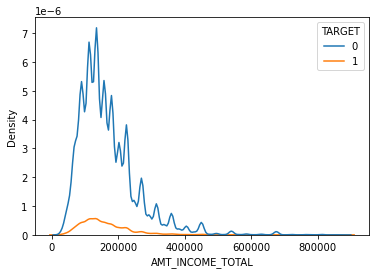

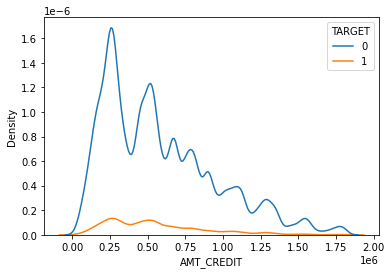

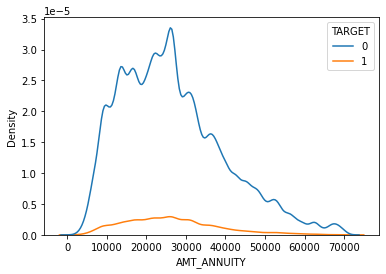

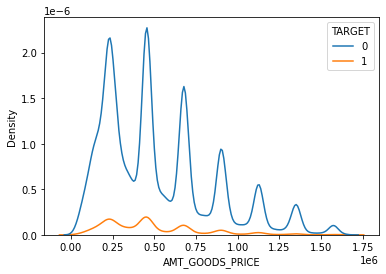

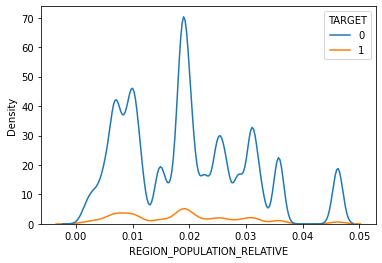

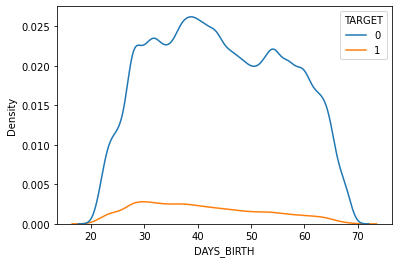

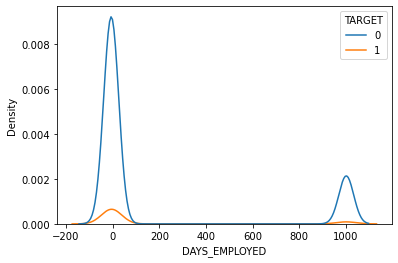

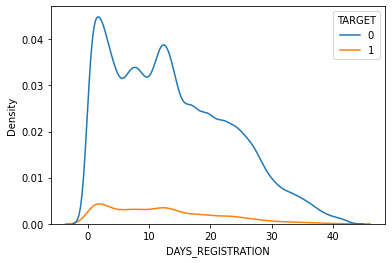

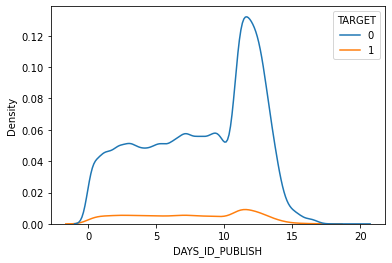

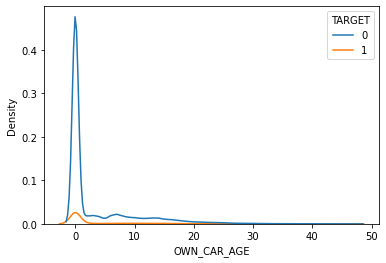

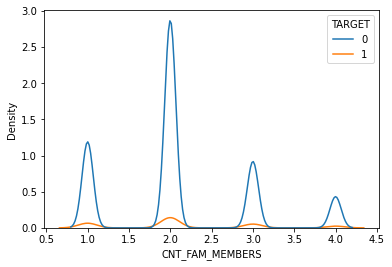

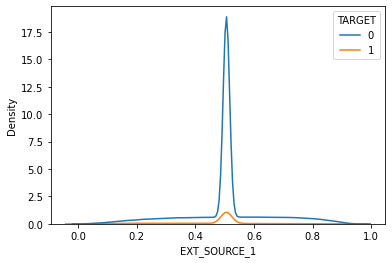

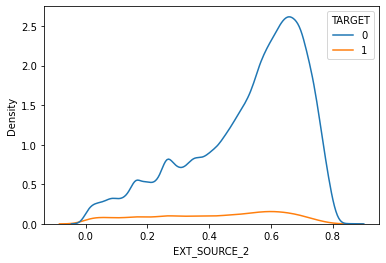

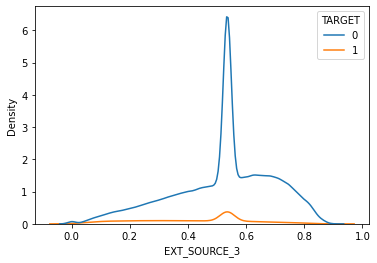

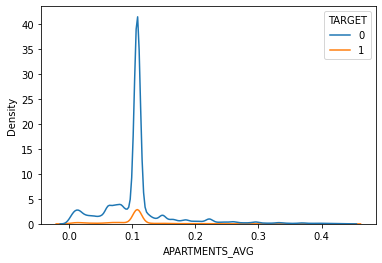

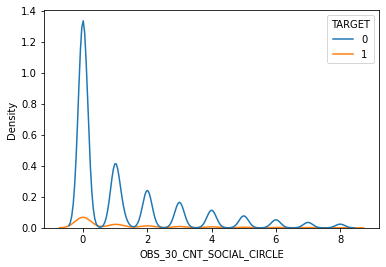

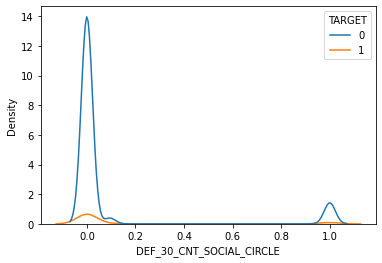

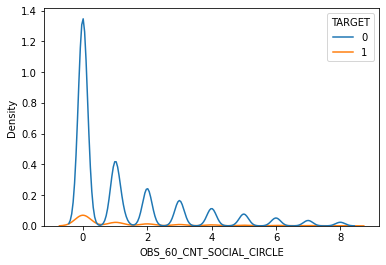

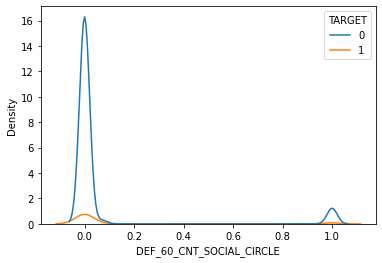

C:\Users\siyer\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\siyer\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


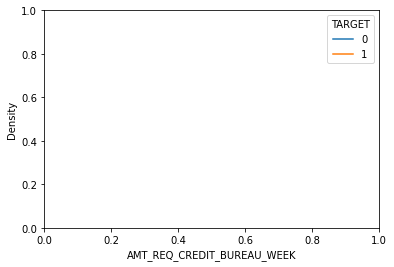

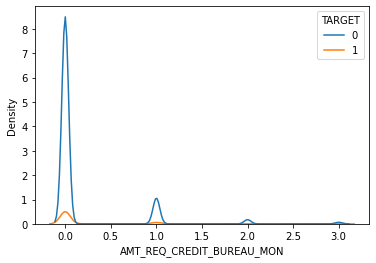

In [37]:
for col in continuos_columns:
    sns.kdeplot(x = col, data = app_train, hue = 'TARGET', fill = False)
    plt.show()

In [39]:
cols = binary_categorical_columns[:]
cols.extend(categorical_columns)
cols.extend(continuos_columns)
cols.append('SK_ID_CURR')

In [40]:
app_test = app_test[cols]

In [41]:
app_test.shape

(48744, 40)

In [42]:
cols.append('TARGET')
app_train = app_train[cols]

In [43]:
app_train.shape

(307511, 41)

In [47]:
app_train_dummies = pd.get_dummies(app_train, drop_first = True)

In [49]:
app_test_dummies = pd.get_dummies(app_test, drop_first = True)

In [53]:
app_train_dummies.to_csv(data_path + 'Processed/app_train_dummies.csv')
app_test_dummies.to_csv(data_path + 'Processed/app_test_dummies.csv')

#### Credit Card Balance

In [58]:
bureau = pd.read_csv(data_path + 'Raw/bureau.csv')
balance = pd.read_csv(data_path + 'Raw/bureau_balance.csv')

In [79]:
bureau.head()

SK_ID_CURR CREDIT_ACTIVE  CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
0      215354        Closed                   0               -153.0   
1      215354        Active                   0               1075.0   
2      215354        Active                   0                528.0   
3      215354        Active                   0                  NaN   
4      215354        Active                   0               1197.0   

   DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
0             -153.0                     NaN                   0   
1                NaN                     NaN                   0   
2                NaN                     NaN                   0   
3                NaN                     NaN                   0   
4                NaN                 77674.5                   0   

   AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
0         91323.0                  0.0                   NaN   
1        225000.0             171342.0                   NaN   
2        464323.5                  NaN                   NaN   
3         90000.0                  NaN                   NaN   
4       2700000.0                  NaN                   NaN   

   AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0                     0.0  Consumer credit                -131          NaN  
1                     0.0      Credit card                 -20          NaN  
2                     0.0  Consumer credit                 -16          NaN  
3                     0.0      Credit card                 -16          NaN  
4                     0.0  Consumer credit                 -21          NaN

In [78]:
bureau.drop(columns = ['SK_ID_BUREAU', 'CREDIT_CURRENCY', 'DAYS_CREDIT'],inplace = True)

In [77]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [80]:
bureau.CREDIT_TYPE.value_counts()

Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                                555
Loan for working capital replenishment              469
Cash loan (non-earmarked)                            56
Real estate loan                                     27
Loan for the purchase of equipment                   19
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

In [85]:
agg = { 
'CREDIT_ACTIVE' : 'count',\
'AMT_CREDIT_MAX_OVERDUE' : 'max',\
'CNT_CREDIT_PROLONG': 'mean',\
'AMT_CREDIT_SUM': 'sum',\
'AMT_CREDIT_SUM_DEBT': 'sum',\
'AMT_CREDIT_SUM_LIMIT': 'sum',\
'AMT_CREDIT_SUM_OVERDUE': 'sum',\
'AMT_ANNUITY': 'sum'
}

In [81]:
revolving = ['Credit card']

In [83]:
revolving_bureau = bureau[bureau.CREDIT_TYPE == 'Credit card']
Non_revolving_bureau = bureau[~(bureau.CREDIT_TYPE == 'Credit card')]

In [86]:
revolving_bureau_agg = revolving_bureau.groupby('SK_ID_CURR').agg(agg)

In [87]:
Non_revolving_bureau_agg = Non_revolving_bureau.groupby('SK_ID_CURR').agg(agg)

In [88]:
revolving_bureau_agg.head()

CREDIT_ACTIVE  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
SK_ID_CURR                                                              
100002                  4                    40.5                 0.0   
100003                  2                     0.0                 0.0   
100005                  1                     NaN                 0.0   
100009                  2                     NaN                 0.0   
100011                  1                     0.0                 0.0   

            AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
SK_ID_CURR                                                              
100002          140249.565                  0.0             31988.565   
100003          922500.000                  0.0            810000.000   
100005           58500.000                  0.0                 0.000   
100009          524700.000             326628.0                 0.000   
100011           54000.000                  0.0                 0.000   

            AMT_CREDIT_SUM_OVERDUE  AMT_ANNUITY  
SK_ID_CURR                                       
100002                         0.0          0.0  
100003                         0.0          0.0  
100005                         0.0          0.0  
100009                         0.0          0.0  
100011                         0.0          0.0

In [89]:
Non_revolving_bureau_agg.head()

CREDIT_ACTIVE  AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  \
SK_ID_CURR                                                              
100001                  7                     NaN                 0.0   
100002                  4                5043.645                 0.0   
100003                  2                   0.000                 0.0   
100004                  2                   0.000                 0.0   
100005                  2                   0.000                 0.0   

            AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
SK_ID_CURR                                                              
100001           1453365.0             596686.5                   0.0   
100002            724806.0             245781.0                   0.0   
100003             94900.5                  0.0                   0.0   
100004            189037.8                  0.0                   0.0   
100005            598626.0             568408.5                   0.0   

            AMT_CREDIT_SUM_OVERDUE  AMT_ANNUITY  
SK_ID_CURR                                       
100001                         0.0      24817.5  
100002                         0.0          0.0  
100003                         0.0          0.0  
100004                         0.0          0.0  
100005                         0.0       4261.5

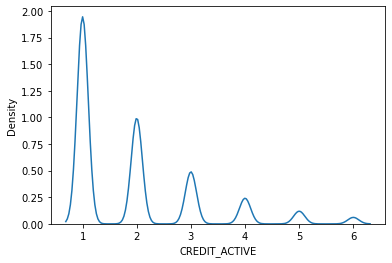

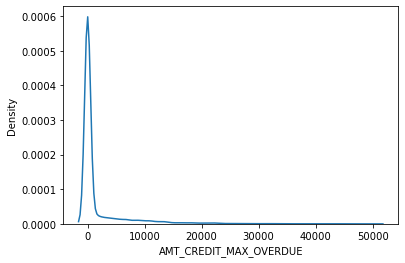

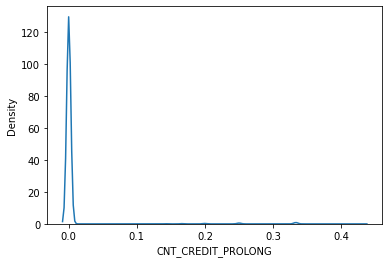

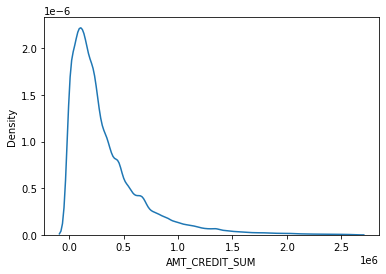

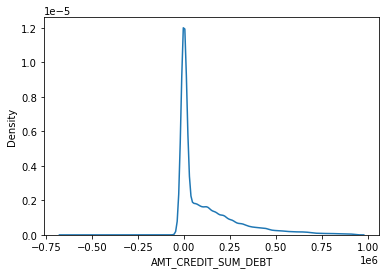

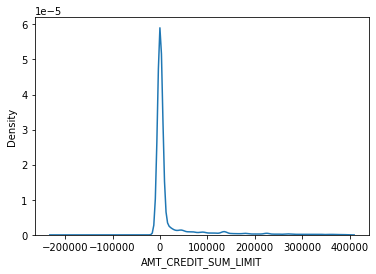

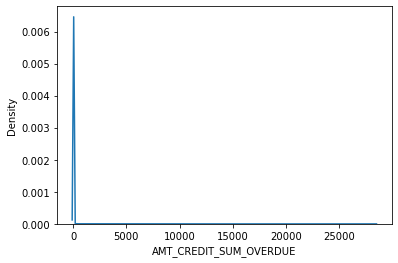

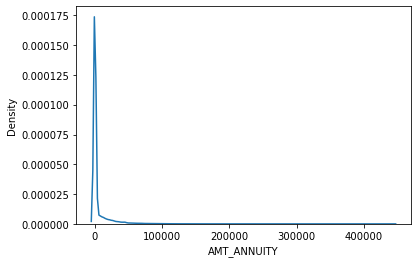

In [92]:
for c in revolving_bureau_agg.columns:
    revolving_bureau_agg = remove_outliers(revolving_bureau_agg, c)
    sns.kdeplot(x = c, data = revolving_bureau_agg, fill = False)
    plt.show()

In [94]:
revolving_bureau_agg.columns

Index(['CREDIT_ACTIVE', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY'],
      dtype='object')

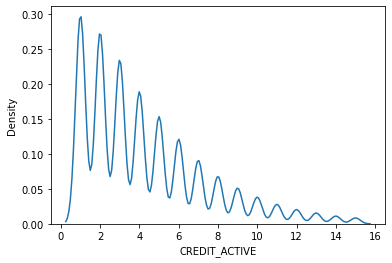

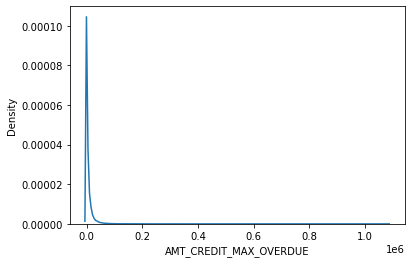

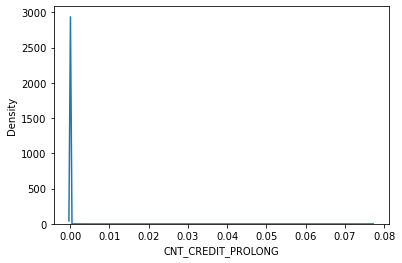

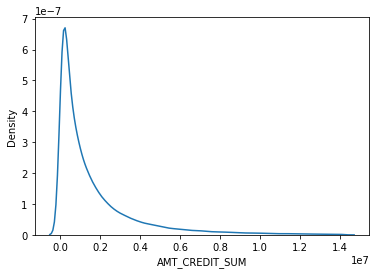

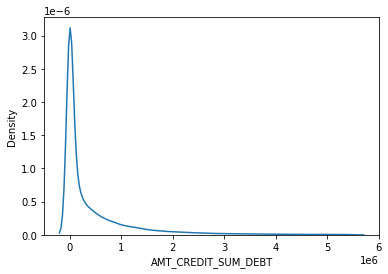

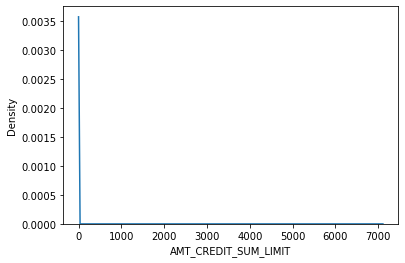

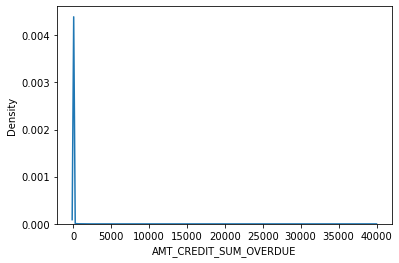

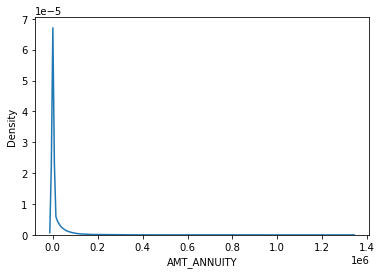

In [93]:
for c in Non_revolving_bureau_agg.columns:
    Non_revolving_bureau_agg = remove_outliers(Non_revolving_bureau_agg, c)
    sns.kdeplot(x = c, data = Non_revolving_bureau_agg, fill = False)
    plt.show()

In [97]:
missing = {
'CREDIT_ACTIVE' : 0,\
 'AMT_CREDIT_MAX_OVERDUE' : 0,\
 'CNT_CREDIT_PROLONG' : 0,\
 'AMT_CREDIT_SUM' : 0,\
 'AMT_CREDIT_SUM_DEBT' : 0,\
 'AMT_CREDIT_SUM_LIMIT' : -1,\
 'AMT_CREDIT_SUM_OVERDUE' : -1,\
 'AMT_ANNUITY' : -1
}

In [98]:
for key, value in missing.items():
    Non_revolving_bureau_agg[key].fillna(value, inplace = True)
    revolving_bureau_agg[key].fillna(value, inplace = True)

In [99]:
bureau_agg = revolving_bureau_agg.join(Non_revolving_bureau_agg, how = 'outer', lsuffix = '_rev', rsuffix = '_nonrev' )

In [101]:
bureau_agg.fillna(-1, inplace = True)

In [103]:
bureau_agg.head()

CREDIT_ACTIVE_rev  AMT_CREDIT_MAX_OVERDUE_rev  \
SK_ID_CURR                                                  
100001                   -1.0                        -1.0   
100002                    4.0                        40.5   
100003                    2.0                         0.0   
100004                   -1.0                        -1.0   
100005                    1.0                         0.0   

            CNT_CREDIT_PROLONG_rev  AMT_CREDIT_SUM_rev  \
SK_ID_CURR                                               
100001                        -1.0              -1.000   
100002                         0.0          140249.565   
100003                         0.0          922500.000   
100004                        -1.0              -1.000   
100005                         0.0           58500.000   

            AMT_CREDIT_SUM_DEBT_rev  AMT_CREDIT_SUM_LIMIT_rev  \
SK_ID_CURR                                                      
100001                         -1.0                    -1.000   
100002                          0.0                 31988.565   
100003                          0.0                    -1.000   
100004                         -1.0                    -1.000   
100005                          0.0                     0.000   

            AMT_CREDIT_SUM_OVERDUE_rev  AMT_ANNUITY_rev  CREDIT_ACTIVE_nonrev  \
SK_ID_CURR                                                                      
100001                            -1.0             -1.0                   7.0   
100002                             0.0              0.0                   4.0   
100003                             0.0              0.0                   2.0   
100004                            -1.0             -1.0                   2.0   
100005                             0.0              0.0                   2.0   

            AMT_CREDIT_MAX_OVERDUE_nonrev  CNT_CREDIT_PROLONG_nonrev  \
SK_ID_CURR                                                             
100001                              0.000                        0.0   
100002                           5043.645                        0.0   
100003                              0.000                        0.0   
100004                              0.000                        0.0   
100005                              0.000                        0.0   

            AMT_CREDIT_SUM_nonrev  AMT_CREDIT_SUM_DEBT_nonrev  \
SK_ID_CURR                                                      
100001                  1453365.0                    596686.5   
100002                   724806.0                    245781.0   
100003                    94900.5                         0.0   
100004                   189037.8                         0.0   
100005                   598626.0                    568408.5   

            AMT_CREDIT_SUM_LIMIT_nonrev  AMT_CREDIT_SUM_OVERDUE_nonrev  \
SK_ID_CURR                                                               
100001                              0.0                            0.0   
100002                              0.0                            0.0   
100003                              0.0                            0.0   
100004                              0.0                            0.0   
100005                              0.0                            0.0   

            AMT_ANNUITY_nonrev  
SK_ID_CURR                      
100001                 24817.5  
100002                     0.0  
100003                     0.0  
100004                     0.0  
100005                  4261.5

In [105]:
bureau_agg.to_csv(data_path + 'Processed/bureau_agg.csv')

#### CREDIT CARD

In [107]:
cc = pd.read_csv(data_path + 'Raw/credit_card_balance.csv')

In [108]:
cc.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [109]:
cc.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [111]:
agg = {'MONTHS_BALANCE' : 'min', \
'AMT_BALANCE' : 'min',\
'AMT_CREDIT_LIMIT_ACTUAL' : 'max',\
'SK_DPD' : 'max',\
'SK_DPD_DEF' : 'max'}

In [112]:
cc_agg = cc.groupby('SK_ID_CURR').agg(agg)

In [115]:
cc_agg.to_csv(data_path + 'Processed/cc_agg.csv')

In [116]:
##DATASET

In [117]:
bureau_agg = bureau_agg.reset_index()
cc_agg = cc_agg.reset_index()

In [119]:
app_train = app_train_dummies.merge(bureau_agg, how = 'left', on = 'SK_ID_CURR')
app_test = app_test_dummies.merge(bureau_agg, how = 'left', on = 'SK_ID_CURR')

In [120]:
app_train = app_train.merge(cc_agg, how = 'left', on = 'SK_ID_CURR')
app_test = app_test.merge(cc_agg, how = 'left', on = 'SK_ID_CURR')

In [121]:
app_train.fillna(-1, inplace = True)
app_test.fillna(-1, inplace = True)

In [125]:
scale_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',\
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE','CNT_FAM_MEMBERS',\
        'APARTMENTS_AVG', 'AMT_CREDIT_MAX_OVERDUE_rev', 'CNT_CREDIT_PROLONG_rev','AMT_CREDIT_SUM_rev',\
        'AMT_CREDIT_SUM_DEBT_rev','AMT_CREDIT_SUM_LIMIT_rev', 'AMT_CREDIT_SUM_OVERDUE_rev',\
       'AMT_ANNUITY_rev', 'CREDIT_ACTIVE_nonrev','AMT_CREDIT_MAX_OVERDUE_nonrev', 'CNT_CREDIT_PROLONG_nonrev',\
       'AMT_CREDIT_SUM_nonrev', 'AMT_CREDIT_SUM_DEBT_nonrev','AMT_CREDIT_SUM_LIMIT_nonrev', 'AMT_CREDIT_SUM_OVERDUE_nonrev',\
       'AMT_ANNUITY_nonrev', 'MONTHS_BALANCE', 'AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL']

In [127]:
scaler = StandardScaler()

In [130]:
y = app_train['TARGET']
col = list(app_train.columns)
col.remove('TARGET')
X = app_train[col]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [132]:
scaler.fit(X_train[scale_columns])

StandardScaler()

In [133]:
X_train[scale_columns] =  scaler.transform(X_train[scale_columns])

<ipython-input-133-98f945851c26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[scale_columns] =  scaler.transform(X_train[scale_columns])
C:\Users\siyer\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [135]:
X_test[scale_columns] =  scaler.transform(X_test[scale_columns])

<ipython-input-135-158f6402914d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[scale_columns] =  scaler.transform(X_test[scale_columns])
C:\Users\siyer\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [136]:
id_test = X_test.SK_ID_CURR

In [137]:
app_train[scale_columns] =  scaler.transform(app_train[scale_columns])


In [138]:
app_test[scale_columns] =  scaler.transform(app_test[scale_columns])

In [139]:
train =  app_train[~app_train.SK_ID_CURR.isin(id_test)]

In [140]:
test =  app_train[app_train.SK_ID_CURR.isin(id_test)]

In [141]:
train = train.set_index('SK_ID_CURR')
test = test.set_index('SK_ID_CURR')

In [150]:
app_train.TARGET

SK_ID_CURR
100002    1
100003    0
100004    0
100006    0
100007    0
100008    0
100009    0
100010    0
100011    0
100012    0
100014    0
100015    0
100016    0
100017    0
100018    0
100019    0
100020    0
100021    0
100022    0
100023    0
100024    0
100025    0
100026    0
100027    0
100029    0
100030    0
100031    1
100032    0
100033    0
100034    0
100035    0
100036    0
100037    0
100039    0
100040    0
100041    0
100043    0
100044    0
100045    0
100046    0
100047    1
100048    0
100049    1
100050    0
100051    0
100052    0
100053    0
100054    0
100055    0
100056    0
100058    0
100059    0
100060    0
100061    0
100062    0
100063    0
100064    0
100068    0
100069    0
100070    0
100071    0
100072    0
100073    0
100075    0
100076    0
100077    0
100078    0
100079    0
100080    0
100081    0
100082    0
100083    0
100084    0
100085    0
100086    0
100087    0
100088    0
100089    0
100093    0
100094    0
100095    0
100096    1
10009

In [149]:
app_train.shape

(307511, 88)

In [147]:
test.shape

(61503, 88)

In [142]:
train.to_csv(data_path + 'Processed/train.csv')
test.to_csv(data_path + 'Processed/val.csv')
app_test.to_csv(data_path + 'Processed/test.csv')

In [144]:
app_train = app_train.set_index('SK_ID_CURR')
app_train.to_csv(data_path + 'Processed/full_train.csv')